# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
flat_sale = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
display(flat_sale.head(10))
flat_sale.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

    В наборе данных много полей с пропущенными значчениями и значениями типов данных не соответствующих содержащимся в ячейках значечниям. Также присутствует избыточная информация, которая не будет использоваться для анализа данных и ответов на поставленные вопросы. Скорее всего причиной пропусков значений в большинстве полей является человеческий фактор. Зачастую люди в объявлениях замаклчивают негативные стороны объекта продажи (этаж, высота потолков). Также возможно, что человек просто не задумывается об определенных параметрах. Например, если рядом нет аэропортов, то продавец не будет указывать расстояние до него (airports_nearest). Такое же предположение подходит и для полей cityCenters_nearest parks_around3000  parks_nearest ponds_around3000 ponds_nearest. Если на продажу выставляются аппартаменты, человек скорее всего укажет этот параметр, если же квартира, то продавец врядли акцентирует внимание на том, что это не аппартаменты. Жилую площадь как и площадь кухни люди скорее всего не указывают по невнимательности, указывая лишь общую площадь, также как с этажом квартиры и общим количеством этажей в доме.

### Шаг 2. Предобработка данных

In [3]:
flat_sale['balcony'] = flat_sale['balcony'].fillna(0).astype('int')
flat_sale['floors_total'] = flat_sale['floors_total'].fillna(0).astype('int')
flat_sale['first_day_exposition'] = pd.to_datetime(flat_sale['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')
#flat_sale['ceiling_height'] = flat_sale['ceiling_height'].fillna(flat_sale['ceiling_height'].median())
print(flat_sale.pivot_table(index = 'floors_total', values = 'ceiling_height', aggfunc = ['count', 'median']))
flat_sale.info()
display(flat_sale.head())

                      count         median
             ceiling_height ceiling_height
floors_total                              
0                         9           2.80
1                        10           2.80
2                       215           2.70
3                       399           2.80
4                       789           3.00
5                      3666           2.55
6                       619           3.00
7                       398           3.00
8                       220           2.80
9                      2557           2.55
10                      750           2.60
11                      109           2.75
12                      853           2.65
13                      117           2.70
14                      343           2.60
15                      225           2.70
16                      865           2.70
17                      503           2.70
18                      275           2.70
19                      134           2.75
20         

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,NaN,...,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,NaN,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,NaN,9,NaN,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Количество комнат, этажей, парков, водоемов, дней продажи может быть только целым числом.
Однако ввиду особенностей типа пустых значений (NAN), я заменил только тип значений в поле 'floors_total' и 'balcony'. 
Также преобразован тип поля 'first_day_exposition' из строки для удобства работы с форматом даты. 
Пропущенные значения в поле 'ceiling_height' заменены на медианные, поскольку этот столбец участвует в анализе данных.
Пропущенные значения в поле 'balcony' заменены на нулевые, в соответсвии с описанием задания.

### Шаг 3. Посчитайте и добавьте в таблицу

In [4]:
print('коэффициент корреляции количества комнат и жилой площади', flat_sale['rooms'].corr(flat_sale['living_area']))
print('коэффициент корреляции количества комнат и площади кухни', flat_sale['rooms'].corr(flat_sale['kitchen_area']))
flat_sale['price_per_metr'] = (flat_sale['last_price']/flat_sale['total_area']).round(2)
flat_sale['date_info_weekday'] = pd.DatetimeIndex(flat_sale['first_day_exposition']).weekday
flat_sale['date_info_month'] = pd.DatetimeIndex(flat_sale['first_day_exposition']).month
flat_sale['date_info_year'] = pd.DatetimeIndex(flat_sale['first_day_exposition']).year                                          
# def date_info_weekday(row):
#     list_date_info = []
#     weekday = row['first_day_exposition'].weekday()
#     return weekday

# def date_info_month(row):
#     month = row['first_day_exposition'].month
#     list_date_info.append(month)
#     return month

# def date_info_year(row):
#     year = row['first_day_exposition'].year
#     list_date_info.append(year)
#     return year
# #df['date_info'] = df.apply(date_info, axis=1)
#      
#      
# df[['date_info_weekday', 'date_info_month', 'date_info_year']] = df.apply(date_info, axis=1)

def type_floor(row):
    if row['floors_total'] == 0:
        row['floors_total'] == row['floor']
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'        
flat_sale['type_floor'] = flat_sale.apply(type_floor, axis=1)
#print(df[df['rooms'] >= 10]['kitchen_area'])
#print(df.groupby('rooms')['living_area'].median())
#print(df.groupby('rooms')['kitchen_area'].median())

rooms_unique_with_nan_l = flat_sale[flat_sale['living_area'].isnull()]['rooms'].unique()
rooms_unique_with_nan_k = flat_sale[flat_sale['kitchen_area'].isnull()]['rooms'].unique()
floors_total_unique = flat_sale['floors_total'].unique()
m_list_for_living_area = []
m_list_for_kitchen_area = []
m_list_for_ceiling_height = []
for count_rooms in rooms_unique_with_nan_l: 
    m_for_living_area = round((flat_sale[flat_sale['rooms'] == count_rooms]['living_area']).median(),2)
    m_list_for_living_area.append(m_for_living_area)
for count_rooms in rooms_unique_with_nan_k:    
    m_for_kitchen_area = round((flat_sale[flat_sale['rooms'] == count_rooms]['kitchen_area']).median(),2)
    m_list_for_kitchen_area.append(m_for_kitchen_area)
for count_floors in floors_total_unique:    
    m_for_ceiling_height = round((flat_sale[flat_sale['floors_total'] == count_floors]['ceiling_height']).median(),0)
    m_list_for_ceiling_height.append(m_for_ceiling_height)    
dict_for_living_area = dict(zip(rooms_unique_with_nan_l, m_list_for_living_area))
dict_for_kitchen_area = dict(zip(rooms_unique_with_nan_k, m_list_for_kitchen_area))
dict_for_ceiling_height = dict(zip(floors_total_unique, m_list_for_ceiling_height))
dict_for_kitchen_area[0] = 5.00
#Согласно строительным нормам и правилам (СНиП), площадь комнаты в однокомнатной квартире должна быть не менее 14 
#квадратных метров, а кухни, по самым «мягким» правилам, — 5 квадратных метров
dict_for_ceiling_height[33] = 3.00 # как для большинства высоток

def relation_living_area (row):
    rooms = row['rooms']
    living_area = row['living_area']
    if np.isnan(living_area):
        med_replace_living_area = dict_for_living_area[rooms]
        return med_replace_living_area
    else:    
        return living_area
#------------------------------------
#Функция для замены значений в столбце kitchen_area (не знаю как вовращать или выводить значения для 2-х столбцов обновременно,
#поэтому разделил функции)
def relation_kitchen_area(row):
    rooms = row['rooms']
    kitchen_area = row['kitchen_area']
    if np.isnan(kitchen_area):
        med_replace_kitchen_area = dict_for_kitchen_area[rooms] 
        return med_replace_kitchen_area
    else:    
        return kitchen_area
    
def replace_nan_ceiling_height(row):
    floors_total = row['floors_total']
    ceiling_height = row['ceiling_height']
    if np.isnan(ceiling_height):
        med_replace_ceiling_height = dict_for_ceiling_height[floors_total] 
        return med_replace_ceiling_height
    else:    
        return ceiling_height    

print(dict_for_ceiling_height)    
flat_sale['living_area'] = flat_sale.apply(relation_living_area, axis = 1)
flat_sale['kitchen_area'] = flat_sale.apply(relation_kitchen_area, axis = 1)
flat_sale['ceiling_height'] = flat_sale.apply(replace_nan_ceiling_height, axis = 1)
flat_sale['relation_living_area'] = flat_sale['living_area']/flat_sale['total_area'] 
flat_sale['relation_kitchen_area'] = flat_sale['kitchen_area']/flat_sale['total_area'] 
flat_sale.info()
display(flat_sale.head(10))

коэффициент корреляции количества комнат и жилой площади 0.8459774567888746
коэффициент корреляции количества комнат и площади кухни 0.26994485416385783


/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


{16: 3.0, 11: 3.0, 5: 3.0, 14: 3.0, 12: 3.0, 26: 3.0, 24: 3.0, 27: 3.0, 9: 3.0, 6: 3.0, 17: 3.0, 25: 3.0, 3: 3.0, 23: 3.0, 19: 3.0, 18: 3.0, 4: 3.0, 22: 3.0, 8: 3.0, 2: 3.0, 10: 3.0, 7: 3.0, 13: 3.0, 15: 3.0, 0: 3.0, 20: 3.0, 28: 3.0, 36: 15.0, 21: 3.0, 35: 3.0, 34: 3.0, 60: 3.0, 1: 3.0, 29: 3.0, 33: 3.0, 52: 3.0, 37: 2.0}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 29 columns):
total_images             23699 non-null int64
last_price               23699 non-null float64
total_area               23699 non-null float64
first_day_exposition     23699 non-null datetime64[ns]
rooms                    23699 non-null int64
ceiling_height           23699 non-null float64
floors_total             23699 non-null int64
living_area              23699 non-null float64
floor                    23699 non-null int64
is_apartment             2775 non-null object
studio                   23699 non-null bool
open_plan                23699 non-null bool

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_metr,date_info_weekday,date_info_month,date_info_year,type_floor,relation_living_area,relation_kitchen_area
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,NaN,...,2.0,755.0,NaN,120370.37,3,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.40,2018-12-04,1,3.00,11,18.60,1,NaN,...,0.0,NaN,81.0,82920.79,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.00,2015-08-20,2,3.00,5,34.30,4,NaN,...,2.0,574.0,558.0,92785.71,3,8,2015,другой,0.612500,0.148214
3,0,64900000.0,159.00,2015-07-24,3,3.00,14,45.00,9,NaN,...,3.0,234.0,424.0,408176.10,4,7,2015,другой,0.283019,0.059748
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,NaN,...,1.0,48.0,121.0,100000.00,1,6,2018,другой,0.320000,0.410000
5,10,2890000.0,30.40,2018-09-10,1,3.00,12,14.40,5,NaN,...,NaN,NaN,55.0,95065.79,0,9,2018,другой,0.473684,0.299342
6,6,3700000.0,37.30,2017-11-02,1,3.00,26,10.60,6,NaN,...,0.0,NaN,155.0,99195.71,3,11,2017,другой,0.284182,0.386059
7,5,7915000.0,71.60,2019-04-18,2,3.00,24,30.50,22,NaN,...,0.0,NaN,NaN,110544.69,3,4,2019,другой,0.425978,0.263966
8,20,2900000.0,33.16,2018-05-23,1,3.00,27,15.43,26,NaN,...,NaN,NaN,189.0,87454.76,2,5,2018,другой,0.465320,0.265682
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,NaN,...,0.0,NaN,289.0,88524.59,6,2,2017,другой,0.714754,0.106557


### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

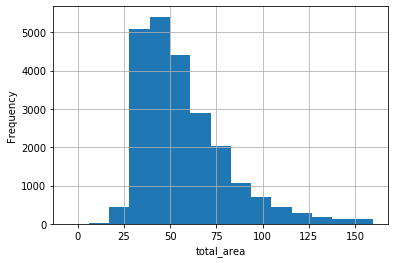

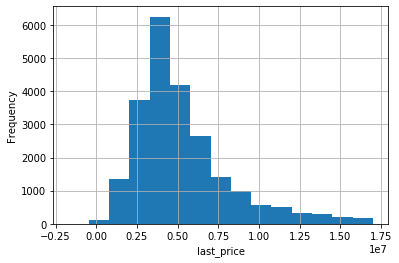

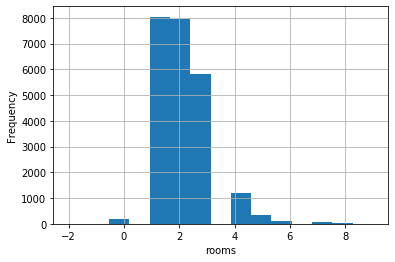

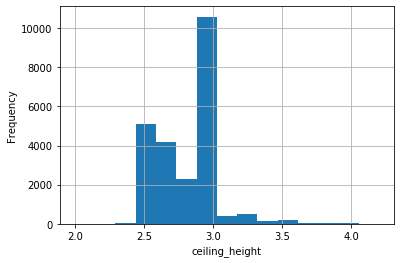

In [5]:
##print(pd.plotting.scatter_matrix(df[['total_area', 'last_price', 'rooms', 'ceiling_height']], figsize = (9,9)))
#list_parametr = ['total_area', 'last_price', 'rooms', 'ceiling_height']
#for i in list_parametr:
#    flat_sale[flat_sale['total_area'] < 400]['total_area'].hist(bins = 8)
#
#plt.show()
##print(df[df['last_price'] > 40000000]['last_price'].count())
##display(df['last_price'].sort_values(ascending = False).head(50))
#(flat_sale[flat_sale['last_price'] < 40000000]['last_price']/1000000).hist(bins = 20)
#print('last_price')
#plt.show()
##print(df['rooms'].value_counts())
#(flat_sale[flat_sale['rooms'] < 8]['rooms']).hist(bins = 8)
#print('rooms')
#plt.show()
##display(df[df['ceiling_height'] > 4.1]['ceiling_height'].count())
#flat_sale[(flat_sale['ceiling_height'] < 4.1) & (flat_sale['ceiling_height'] > 2.1)]['ceiling_height'].hist(bins = 10, range = (2.1, 4.1))
#print('ceiling_height')
#plt.show()

list_parametr = ['total_area', 'last_price', 'rooms', 'ceiling_height']
for i in list_parametr:
    Q1 = flat_sale[i].quantile(q=0.25)
    Q3 = flat_sale[i].quantile(q=0.75)
    IQR = Q3 - Q1 
    flat_sale[i].plot(kind = 'hist' ,bins = 15, range = (Q1-1.5*IQR, Q3+3*IQR), grid = True)
    plt.xlabel(i)
    plt.show()
                    


    Для построения более качественных и наглядных гистограмм отфильтрованы редкие и выбивающиеся значения. выводы приведены в пункте сравнения факторов с центральным районом. 

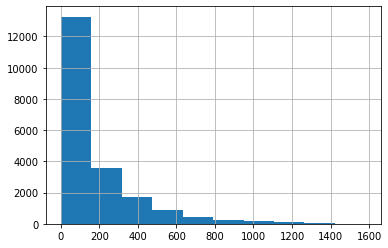

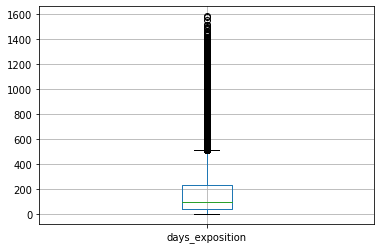

Визуально аномально долгие продажи 594 квартир более 800 дней
Визуально аномально быстрые продажи 3738 квартир менее 30 дней
среднее значение 180.88863436982163
медианное значение 95.0

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


In [6]:
#display(df[df['ceiling_height'] > 4.1]['ceiling_height'].count())
#print(df.pivot_table(index = 'ceiling_height', values = 'rooms', aggfunc = 'count').sort_values(by = 'rooms')
#     .query('rooms < 3').head(60))
flat_sale['days_exposition'].hist(bins = 10)
plt.show()
flat_sale1 = flat_sale[['days_exposition']]
flat_sale1.boxplot()
plt.show()
print('Визуально аномально долгие продажи', flat_sale[flat_sale['days_exposition'] >= 800]['days_exposition'].count(), 'квартир более 800 дней')
print('Визуально аномально быстрые продажи', flat_sale[flat_sale['days_exposition'] <= 30]['days_exposition'].count(), 'квартир менее 30 дней')
median_days_exposition = flat_sale['days_exposition'].median()
mean_days_exposition = flat_sale['days_exposition'].mean()
print('среднее значение', mean_days_exposition)
print('медианное значение', median_days_exposition)
print()
print(flat_sale['days_exposition'].describe())
#по ящику с усами макс ус равен 512.5 (1669 8% не попадают в область)
#эмпир 900 (407  менее 2% не попадают в область)
#обычно продажа проходит не более чем за пол года 69.1% (из проданных), 7.45% не проданны
#если быстрее 1.5 месяцев, то квартира продана быстро 25%

    Если судить по 'ящику с усами', то аномально долгое время продажи квартиры 512 дней (1669 квартир или 8% от общего числа проданных жилых помещений). Если субъективно оценивать по гистограмме (начинаются незначительные показатели), то для продажи более 800 дней всего 594 квартиры или менее 3%). Обычно продажа происходит не более чем за пол года 69.1% (из проданных). Если продажа состоялась быстрее 1 месяца, то квартира продана анамально быстро, и таких 18% (левый ус ящика с усами уперся в предельное значение 0, поэтому не применим для оценки).

значение параметра для фильтрации 114.75000000000001


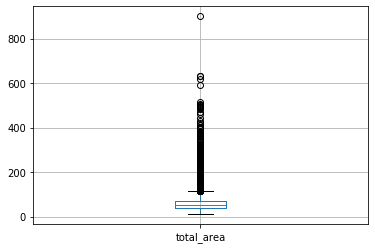

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22459 entries, 0 to 22458
Data columns (total 29 columns):
total_images             22459 non-null int64
last_price               22459 non-null float64
total_area               22459 non-null float64
first_day_exposition     22459 non-null datetime64[ns]
rooms                    22459 non-null int64
ceiling_height           22459 non-null float64
floors_total             22459 non-null int64
living_area              22459 non-null float64
floor                    22459 non-null int64
is_apartment             2616 non-null object
studio                   22459 non-null bool
open_plan                22459 non-null bool
kitchen_area             22459 non-null float64
balcony                  22459 non-null int64
locality_name            22413 non-null object
airports_nearest         16967 non-null float64
cityCenters_nearest      16985 non-null float64
parks_around3000         16986 non-null float64
parks_nearest            7278 non-null 

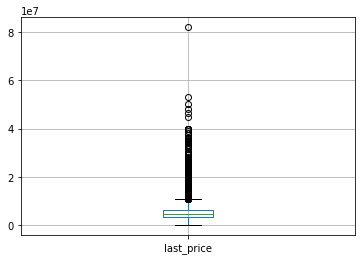

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21119 entries, 0 to 21118
Data columns (total 29 columns):
total_images             21119 non-null int64
last_price               21119 non-null float64
total_area               21119 non-null float64
first_day_exposition     21119 non-null datetime64[ns]
rooms                    21119 non-null int64
ceiling_height           21119 non-null float64
floors_total             21119 non-null int64
living_area              21119 non-null float64
floor                    21119 non-null int64
is_apartment             2453 non-null object
studio                   21119 non-null bool
open_plan                21119 non-null bool
kitchen_area             21119 non-null float64
balcony                  21119 non-null int64
locality_name            21078 non-null object
airports_nearest         15649 non-null float64
cityCenters_nearest      15660 non-null float64
parks_around3000         15661 non-null float64
parks_nearest            6451 non-null 

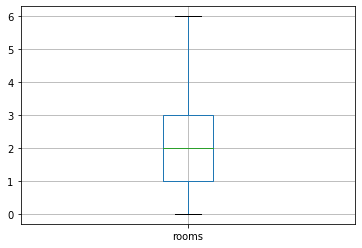

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21119 entries, 0 to 21118
Data columns (total 29 columns):
total_images             21119 non-null int64
last_price               21119 non-null float64
total_area               21119 non-null float64
first_day_exposition     21119 non-null datetime64[ns]
rooms                    21119 non-null int64
ceiling_height           21119 non-null float64
floors_total             21119 non-null int64
living_area              21119 non-null float64
floor                    21119 non-null int64
is_apartment             2453 non-null object
studio                   21119 non-null bool
open_plan                21119 non-null bool
kitchen_area             21119 non-null float64
balcony                  21119 non-null int64
locality_name            21078 non-null object
airports_nearest         15649 non-null float64
cityCenters_nearest      15660 non-null float64
parks_around3000         15661 non-null float64
parks_nearest            6451 non-null 

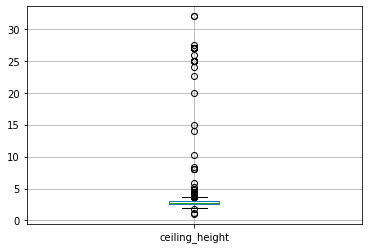

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20997 entries, 0 to 20996
Data columns (total 29 columns):
total_images             20997 non-null int64
last_price               20997 non-null float64
total_area               20997 non-null float64
first_day_exposition     20997 non-null datetime64[ns]
rooms                    20997 non-null int64
ceiling_height           20997 non-null float64
floors_total             20997 non-null int64
living_area              20997 non-null float64
floor                    20997 non-null int64
is_apartment             2424 non-null object
studio                   20997 non-null bool
open_plan                20997 non-null bool
kitchen_area             20997 non-null float64
balcony                  20997 non-null int64
locality_name            20957 non-null object
airports_nearest         15548 non-null float64
cityCenters_nearest      15559 non-null float64
parks_around3000         15560 non-null float64
parks_nearest            6378 non-null 

In [7]:
##display(flat_sale.sort_values(by = 'total_area', ascending = False).head())
# найдена аномально большая квартира площадью 900 м2, 
#но учитывая стоимость (420 млн. р.) последний этаж (25/25) и количество комнат, выглядит правдоподобно
##display(flat_sale[flat_sale['total_area'] > 200]['total_area'].count())
##flat_sale = flat_sale.drop(flat_sale[flat_sale.total_area > 200].index).reset_index(drop = True)
#227 квартир площадью более 200 кв. м составляют менее 1% от всей выборки
# квартир с очень маленькой площадью (<20 м2) на весь Санкт-Петербург и его окрестности всего 27 ед.
##display(flat_sale[flat_sale['last_price'] > 50000000]['last_price'].count())
##flat_sale = flat_sale.drop(flat_sale[flat_sale['last_price'] > 50000000].index).reset_index(drop = True)
#131 квартира стоимостью более 50 млн. р.. Таких менее 1%, но влияние на среднюю цену квартиры могут оказать существенное 
##display(flat_sale['rooms'].value_counts())
##flat_sale = flat_sale.drop(flat_sale[flat_sale.rooms > 9].index).reset_index(drop = True)
#квартир с количеством комнат больше 9 крайне мало (всего 11 помещений), поэтому данными квартирами 
#в масштабе общей выборки можно принебречь
##print(flat_sale['ceiling_height'].value_counts().sort_index(ascending = False).head(20))
##flat_sale = flat_sale.drop(flat_sale[(flat_sale.ceiling_height > 8) & (flat_sale.ceiling_height < 2)].index).reset_index(drop = True)
#квартиры с потолками меньше 2 и больше 8 метров очень странные, больше похожи на погреба или замки (всего 29 помещений),
#их не много, чуть больше 0.1%, поэтому не будем брать в расчет и такие квартиры.
# По рассмотренным параметрам многие записи будут одни и те же, поэтому количество удаленных строк будет меньше
# flat_sale.info()
# Q1 = flat_sale['total_area'].quantile(q=0.25)
# Q3 = flat_sale['total_area'].quantile(q=0.75)
# IQR = Q3 - Q1
# print(Q3+1.5*IQR)
# flat_sale.drop(flat_sale[flat_sale.total_area > Q3+1.5*IQR].index, inplace = True)
# flat_sale.reset_index(drop = True)
# #flat_sale_del.info()
# flat_sale.info()
# dispaly(flat_sale.head(10))
list_parametr = ['total_area', 'last_price', 'rooms', 'ceiling_height']
for i in list_parametr:
    flat_sale.boxplot(i, grid = True)
    Q1 = flat_sale[i].quantile(q=0.25)
    Q3 = flat_sale[i].quantile(q=0.75)
    IQR = Q3 - Q1
    flat_sale = flat_sale[flat_sale[i] <= Q3+1.5*IQR].reset_index(drop = True)
    print('значение параметра для фильтрации', Q3+1.5*IQR)
    plt.show()
    flat_sale.info()

В результате фильтрации удалено 2672 записи с редкими и выбивающимися значениями. Главным образом большие значения удалены 
по параметрам общей площади квартир и цен на них. Незначительная часть значений параметров высоты пололков и количества
комнат отличались от медианного значения больше, чем на 1,5 медианных размаха. 

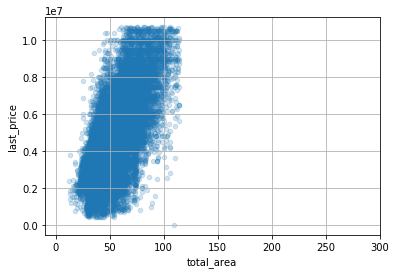

Корреляция от площади 0.676992926392975


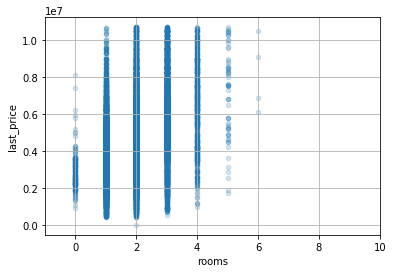

Корреляция от количества комнат 0.4274299514530036


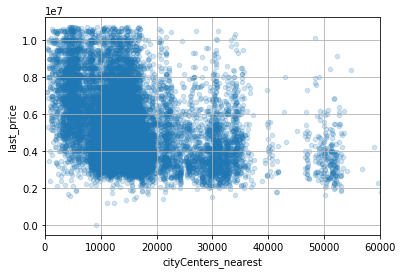

Корреляция от удаленности от центра -0.3370437271719218
первый
 count    2.748000e+03
mean     4.036250e+06
std      1.913024e+06
min      4.300000e+05
25%      2.700000e+06
50%      3.800000e+06
75%      5.054250e+06
max      1.070000e+07
Name: last_price, dtype: float64

другой
 count    1.537500e+04
mean     4.882097e+06
std      1.999598e+06
min      4.500000e+05
25%      3.490000e+06
50%      4.500000e+06
75%      6.000000e+06
max      1.070000e+07
Name: last_price, dtype: float64

последний
 count    2.874000e+03
mean     4.284313e+06
std      2.117927e+06
min      1.219000e+04
25%      2.800000e+06
50%      3.990000e+06
75%      5.400000e+06
max      1.070000e+07
Name: last_price, dtype: float64


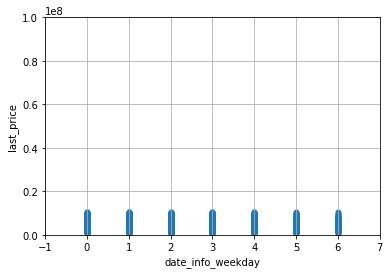

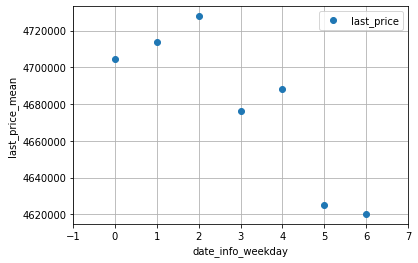

Корреляция от дня недели -0.013140336864767349


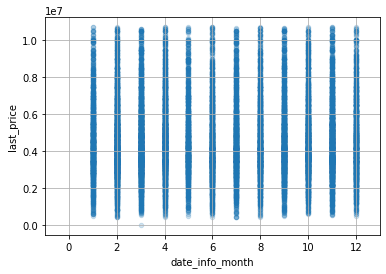

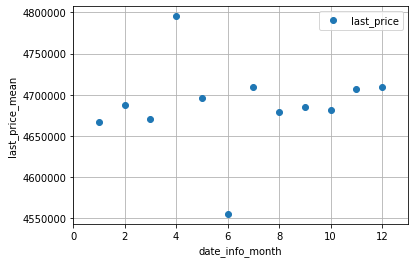

Корреляция от месяца 0.0007614719999972814


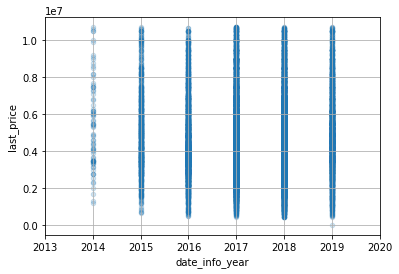

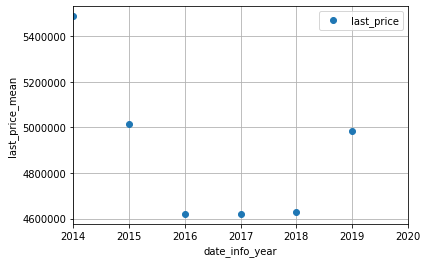

Корреляция от года 0.00871817247380062


In [15]:
flat_sale.plot(y='last_price', x='total_area', kind='scatter', alpha=0.2, grid=True, xlim = (-10, 300))
plt.show()
print('Корреляция от площади', flat_sale['last_price'].corr(flat_sale['total_area']))
#линейная зависимость и большая положительная корреляция при площади до 110 и стоимости до 15 млн р,
#далее наблюдается больший разброс значений
flat_sale.plot(y='last_price', x='rooms', kind='scatter', alpha=0.2, grid=True, xlim = (-1, 10))
plt.show()
print('Корреляция от количества комнат', flat_sale['last_price'].corr(flat_sale['rooms']))
#наблюдается слабая корреляция значений стоимости квартир и количества комнат. Стоит отметить, что стоимость 
#0-4-комнатных квартир начинается со значений от 2-х млн. р., но при этом потолок цен 
#при увеличении количества комнат также растет (5, 15, 27, 38, 41 млн. р. соответственно)
flat_sale.plot(y='last_price', x='cityCenters_nearest', kind='scatter', alpha=0.2, grid=True, xlim = (-1, 60000))
plt.show()
print('Корреляция от удаленности от центра', flat_sale['last_price'].corr(flat_sale['cityCenters_nearest']))
# Чем ближе квартира к центру, тем более разнообразны ценовые предложения. В радиусе 20 км от центра есть большое количество
# предложений жилья стоимостью свыше 10 но не более 20 млн. р.,а в радиусе 10 км цены на многие жилые помещения составляют
# до 40 млн. р..На расстоянии от 20 до 40 км для большинства предложений по продаже цены квартир не превышают 12 млн. р.

print('первый\n',flat_sale[flat_sale['type_floor'] == 'первый']['last_price'].describe())
print()
print('другой\n',flat_sale[flat_sale['type_floor'] == 'другой']['last_price'].describe())
print()
print('последний\n', flat_sale[flat_sale['type_floor'] == 'последний']['last_price'].describe())
#как и ожидалось самыми нерентабельными для продажи оказались квартиры, расположенные на 1 этаже. Наиболее выгодными для продажи
#выглядят жилые помещения, расположенные на последних этажах. Зачастую там находятся квартиры наибольшей площади и с живописным 
#видом из окна, что повышает их стоимость. Также наибольшая стоимость жилых помешений верхних этажей может быть связана с 
#особенностями замены значений NAN. Стоимость помещений на остальных этажах ('другие') характеризуется большим разбросом 
#значений,поэтому анализ их характеристик не имеет смысла.
flat_sale.plot(y='last_price', x='date_info_weekday', kind='scatter', alpha=0.2, grid=True, xlim = (-1, 7), ylim = (-100, 100000000))
plt.show()
(flat_sale.pivot_table(index = 'date_info_weekday', values = 'last_price', aggfunc  = 'mean')
          .plot(grid = True, style = 'o', xlim = (-1, 7)))
plt.ylabel('last_price_mean')
plt.xlabel('date_info_weekday')
plt.show()
print('Корреляция от дня недели', flat_sale['last_price'].corr(flat_sale['date_info_weekday']))

flat_sale.plot(y='last_price', x='date_info_month', kind='scatter', alpha=0.2, grid=True, xlim = (-1, 13))
plt.show()
(flat_sale.pivot_table(index = 'date_info_month', values = 'last_price', aggfunc  = 'mean')
          .plot(grid = True, style = 'o', xlim = (0, 13)))
plt.ylabel('last_price_mean')
plt.xlabel('date_info_month')
plt.show()
print('Корреляция от месяца', flat_sale['last_price'].corr(flat_sale['date_info_month']))

flat_sale.plot(y='last_price', x='date_info_year', kind='scatter', alpha=0.2, grid=True, xlim = (2013, 2020) )
plt.show()
(flat_sale.pivot_table(index = 'date_info_year', values = 'last_price', aggfunc  = 'mean')
          .plot(grid = True, style = 'o', xlim = (2014, 2020)))
plt.ylabel('last_price_mean')
plt.xlabel('date_info_year')
plt.show()
print('Корреляция от года', flat_sale['last_price'].corr(flat_sale['date_info_year']))
#Как видно из коэффицентов и графиков корреляции, зависимости между временными характеристиками начала продажи жилых помещений
#и их стоимостью не наблюдается. Стоит отметить лишь то, что стоимость квартир в 2014-2016 годах была ниже, чем в  2017 и 2018г. 
#print(df['last_price'].corr(df['type_floor']))
#df.plot(x='last_price', y='total_area', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False,
#        grid=True, ylim = (-10, 500), xlim = (-100, 100000000))

         price_per_metr
idxmax  Санкт-Петербург
max              104864
idxmin           Выборг
min             58230.9


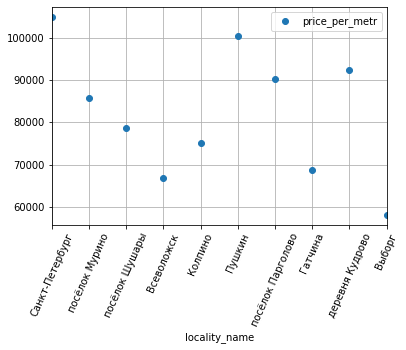

In [9]:
#
print(flat_sale.groupby('locality_name').agg({'total_images':'count', 'price_per_metr': 'mean'})
      .sort_values(by = 'total_images', ascending =  False)
      .head(10)
      .agg({'price_per_metr': ['idxmax', 'max', 'idxmin', 'min']}))
      #.sort_values(by = 'price_per_metr', ascending =  False)
#fig, ax = plt.subplots()
#ax.plot(color = 'b', linewidth = 10)
#ax.tick_params(labelrotation = 60) 
(flat_sale.groupby('locality_name').agg({'total_images':'count', 'price_per_metr': 'mean'})
      .sort_values(by = 'total_images', ascending =  False)
      .head(10).plot(grid = True, style = 'o', y = 'price_per_metr'))
plt.xticks(rotation=66)
plt.show()

price_per_metr                    rooms total_area
                          count           mean      mean       mean
to_the_center_km                                                   
0                            32  117066.654062  2.593750  69.290000
1                           107  116089.412991  2.551402  68.372897
2                           159  112946.195723  2.471698  67.921635
3                           311  109844.567042  2.424437  66.485241
4                           475  118884.880800  2.320000  64.396442
5                           459  121093.479020  2.093682  60.899717
6                           300  117788.069967  1.976667  57.444333
7                           285  116952.999368  2.017544  55.820807
8                           517  110390.460542  1.955513  54.977679
9                           608  105119.540378  1.858553  50.437171
10                          816  106033.739265  1.883578  49.992292
11                         1311  104012.924554  1.926011  50.931960
12                         1380  105350.188051  1.863043  50.101580
13                         1301  105416.940984  1.915450  52.122367
14                         1428  103196.327374  1.813025  51.399454
15                         1299  100490.566921  1.877598  51.182209
16                         1052   98288.594411  1.872624  51.472624
17                          519   93309.088882  1.859345  50.991946
18                          165   93695.136182  1.878788  50.177212
19                           81   95082.949753  1.716049  50.496543
20                           81  107210.604815  1.864198  59.047160
21                          191   90891.509895  1.842932  56.071780
22                          135   88379.468593  2.022222  59.587778
23                           30   92720.642000  1.633333  45.786667
24                           22   82440.344091  1.545455  47.655909
25                           74   91270.484189  1.513514  45.149054
26                            3   75171.913333  1.666667  52.000000
27                            1   70312.500000  1.000000  32.000000
28                           10   81840.638000  2.200000  62.570000
29                            2   65460.200000  1.500000  49.900000

0.7174231232866493
разность на первых 9 км count     -576.000000
mean     11947.113684
dtype: float64
разность на следующих 9 км count      735.000000
mean     10950.789512
dtype: float64


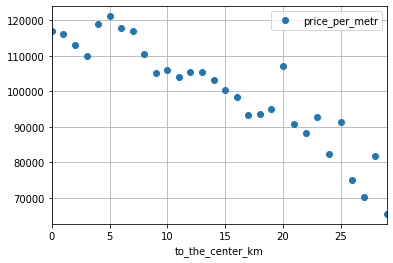

In [13]:
flat_sale_for_center = flat_sale[flat_sale['locality_name'] == 'Санкт-Петербург'].reset_index(drop = True)
flat_sale_for_center = flat_sale_for_center.dropna(subset = ['cityCenters_nearest']).reset_index(drop = True)
# Удалил пустые значения поскольку адекватной замены для них нет и их очень мало (61 строка), что не должно повлиять 
#на результата анализа. 
flat_sale_for_center['to_the_center_km'] = (flat_sale_for_center['cityCenters_nearest']/1000).astype('int')
flat_sale1 = flat_sale_for_center.pivot_table(index = 'to_the_center_km', values = ['price_per_metr', 'rooms', 'total_area'] ,
                                  aggfunc = {'price_per_metr':['mean', 'count'], 'rooms': 'mean', 'total_area': 'mean'})
display(flat_sale1)
print(flat_sale1['price_per_metr', 'mean'].corr(flat_sale1['rooms', 'mean']))
(flat_sale_for_center.pivot_table(index = 'to_the_center_km', values = 'price_per_metr', aggfunc = 'mean')
              .plot(grid = True, style = 'o'))
#не знаю как задать ось по мультииндексу в графике, подскажите плиз
print('разность на первых 9 км', (flat_sale1.loc[0,'price_per_metr'] - flat_sale1.loc[9,'price_per_metr']))
#не знаю как обратиться по мультииндексу к столбцу, подскажите плиз
print('разность на следующих 9 км', (flat_sale1.loc[10,'price_per_metr'] - flat_sale1.loc[19,'price_per_metr']))

    На графике заметно, что наиболее сильным оказывается влияние фактора расстояния от центра до 9 км (разность стоимости квадратного метра 77311 тыс. р.), а для следующих 10 км данная разница составляет всего 16206 тыс. р.. Поэтому к центру предлагаю отнести район с расчитанным расстоянием не более 9 км.

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


total_area
 count    2645.000000
mean       60.913648
std        20.155308
min        12.000000
25%        45.000000
50%        59.000000
75%        75.000000
max       114.200000
Name: total_area, dtype: float64



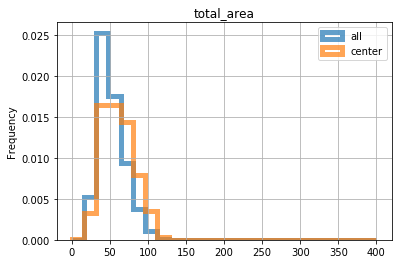

last_price
 count    2.645000e+03
mean     6.787204e+06
std      1.982608e+06
min      1.600000e+06
25%      5.300000e+06
50%      6.700000e+06
75%      8.354205e+06
max      1.070000e+07
Name: last_price, dtype: float64



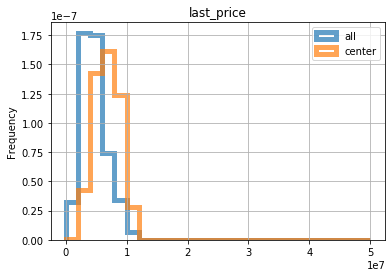

rooms
 count    2645.000000
mean        2.172023
std         0.942911
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: rooms, dtype: float64



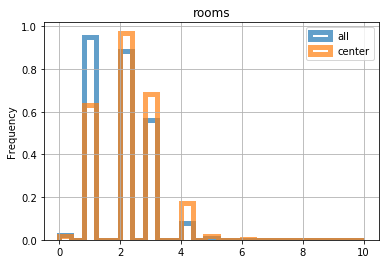

ceiling_height
 count    2645.000000
mean        2.949123
std         0.225628
min         2.400000
25%         2.800000
50%         3.000000
75%         3.000000
max         3.590000
Name: ceiling_height, dtype: float64



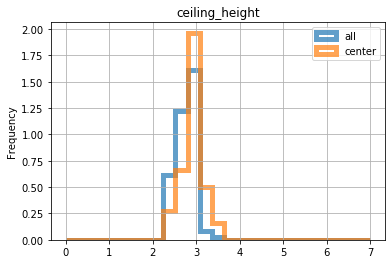

In [11]:
flat_sale2 = flat_sale[(flat_sale['cityCenters_nearest'] <= 9000) & (flat_sale['locality_name'] == 'Санкт-Петербург')].reset_index(drop = True)

ax = flat_sale.plot(kind='hist', y='total_area', histtype='step', range=(0, 400), bins=25, linewidth=5, alpha=0.7, label='all',
             normed=True)
flat_sale2.plot(kind='hist', y='total_area', histtype='step', range=(0, 400),
         bins=25, linewidth=5, alpha=0.7, label='center', ax=ax, grid=True, legend=True, title = 'total_area', normed=True )
print('total_area\n',flat_sale2['total_area'].describe())
print()
plt.show()
ax = flat_sale.plot(kind='hist', y='last_price', histtype='step', range=(0, 50000000), bins=25, linewidth=5, alpha=0.7, label='all',
            normed=True)
flat_sale2.plot(kind='hist', y='last_price', histtype='step', range=(0, 50000000),
         bins=25, linewidth=5, alpha=0.7, label='center', ax=ax, grid=True, legend=True, title = 'last_price', normed=True)
print('last_price\n',flat_sale2['last_price'].describe())
print()
plt.show()
ax = flat_sale.plot(kind='hist', y='rooms', histtype='step', range=(0, 10), bins=25, linewidth=5, alpha=0.7, label='all', normed=True)
flat_sale2.plot(kind='hist', y='rooms', histtype='step', range=(0, 10),
         bins=25, linewidth=5, alpha=0.7, label='center', ax=ax, grid=True, legend=True, title = 'rooms', normed=True)
print('rooms\n',flat_sale2['rooms'].describe())
print()
plt.show()
ax = flat_sale.plot(kind='hist', y='ceiling_height', histtype='step', range=(0, 7), bins=25, linewidth=5, alpha=0.7, label='all',
             normed=True)
flat_sale2.plot(kind='hist', y='ceiling_height', histtype='step', range=(0, 7),
         bins=25, linewidth=5, alpha=0.7, label='center', ax=ax, grid=True, legend=True, title = 'ceiling_height', normed=True)       
print('ceiling_height\n', flat_sale2['ceiling_height'].describe())
print()
plt.show()


    Из анализа гистограмм для центрального и остальных районов можно сделать следующие выводы:
        площадь квартир для центрального района больше и распределена более равномерно (если не считать хвост в б`ольшую сторону), чем для остальных районов, что характеризует их как более комфортные и соответствующие более высокому классу жилья;
        стоимость квартир для центрального района больше и распределена более равномерно (если не считать хвост в б`ольшую сторону), чем для остальных районов, что также вытекает из предыдущего вывода (больше площадь - больше стоимость);
        большая часть квартир расположенных в центре - 3-комнатные. в то время как среди остальных районов более распространены 1-комнатные;
         высота потолков для квартир центрального района больше и распределена более равномерно (если не считать хвост в большую сторону), чем для остальных районов, что характеризует их как более комфортные и соответствующие более высокому классу жилья.
    

зависимость цены от числа комнат для квартир центра 0.4771854266103254


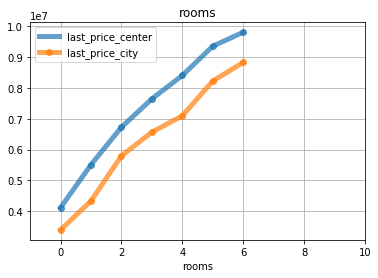

зависимость цены от этажа для квартир центра 0.08463972250765076


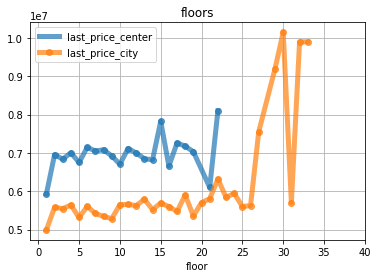

зависимость от удаленности от центра для квартир центра -0.24508553752268894


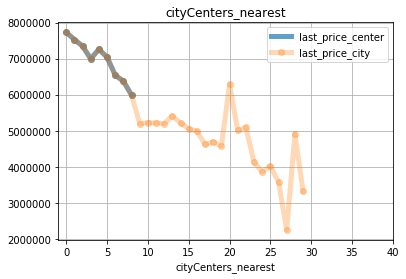

зависимость от дня недели выложенного объявления для квартир центра 0.023556962450542333


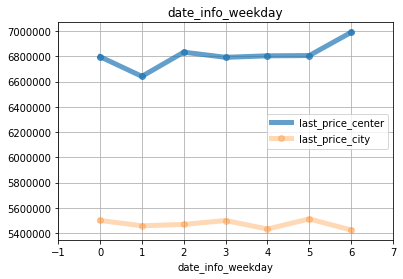

зависимость от месяца выложенного объявления для квартир центра -0.02677270303887665


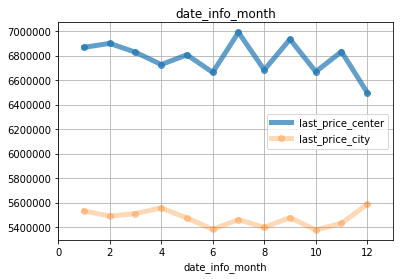

зависимость от года выложенного объявления для квартир центра -0.01003334057676058


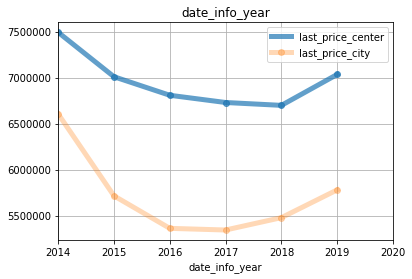

In [12]:
# print('зависимость цены от числа комнат для квартир центра', flat_sale2['rooms'].corr(flat_sale2['last_price']))
# print('зависимость цены от этажа для квартир центра', flat_sale2['floor'].corr(flat_sale2['last_price']))
# print('зависимость от удаленности от центра для квартир центра', flat_sale2['cityCenters_nearest'].corr(flat_sale2['last_price']))
# print('зависимость от дня недели выложенного объявления для квартир центра', flat_sale2['date_info_weekday'].corr(flat_sale2['last_price']))
# print('зависимость от месяца выложенного объявления для квартир центра', flat_sale2['date_info_month'].corr(flat_sale2['last_price']))
# print('зависимость от года выложенного объявления для квартир центра', flat_sale2['date_info_year'].corr(flat_sale2['last_price']))
# print()
# print('зависимость цены от этажа для квартир центра', flat_sale2['floor'].corr(flat_sale2['last_price']))

# print('первый\n',flat_sale2[flat_sale2['type_floor'] == 'первый']['last_price'].describe())
# print()
# print('другой\n',flat_sale2[flat_sale2['type_floor'] == 'другой']['last_price'].describe())
# print()
# print('последний\n', flat_sale2[flat_sale2['type_floor'] == 'последний']['last_price'].describe())
# print()

flat_sale_for_city = flat_sale[flat_sale['locality_name'] == 'Санкт-Петербург'].dropna(subset = ['cityCenters_nearest']).reset_index(drop = True)
flat_sale_for_center = flat_sale[(flat_sale['cityCenters_nearest'] <= 9000) & (flat_sale['locality_name'] == 'Санкт-Петербург')].reset_index(drop = True)
flat_sale_for_center['cityCenters_nearest'] = (flat_sale_for_center['cityCenters_nearest']/1000).astype('int')
flat_sale_for_city['cityCenters_nearest'] = (flat_sale_for_city['cityCenters_nearest']/1000).astype('int')


print('зависимость цены от числа комнат для квартир центра', flat_sale2['rooms'].corr(flat_sale2['last_price']))

rooms_city = flat_sale_for_city.pivot_table(index = 'rooms', values = 'last_price', aggfunc = 'mean')
rooms_city['last_price_city'] = rooms_city['last_price']
del rooms_city['last_price']
rooms_center = flat_sale_for_center.pivot_table(index = 'rooms', values = 'last_price', aggfunc = 'mean')
rooms_center['last_price_center'] =  rooms_center['last_price']
del rooms_center['last_price']
ax = rooms_center.plot( xlim=(-1, 10), linewidth=5, alpha=0.7,style = 'o-')
rooms_city.plot( xlim=(-1, 10), linewidth=5, alpha=0.7, ax=ax, grid=True, legend=True, title = 'rooms', style = 'o-')
plt.show()

print('зависимость цены от этажа для квартир центра', flat_sale2['floor'].corr(flat_sale2['last_price']))

floors_city = flat_sale_for_city.pivot_table(index = 'floor', values = 'last_price', aggfunc = 'mean')
floors_city['last_price_city'] = floors_city['last_price']
del floors_city['last_price']
floors_center = flat_sale_for_center.pivot_table(index = 'floor', values = 'last_price', aggfunc = 'mean')
floors_center['last_price_center'] =  floors_center['last_price']
del floors_center['last_price']
ax = floors_center.plot( xlim=(-1, 40), linewidth=5, alpha=0.7,style = 'o-')
floors_city.plot( xlim=(-1, 40), linewidth=5, alpha=0.7, ax=ax, grid=True, legend=True, title = 'floors', style = 'o-')
plt.show()

print('зависимость от удаленности от центра для квартир центра', flat_sale2['cityCenters_nearest'].corr(flat_sale2['last_price']))

distance_city = flat_sale_for_city.pivot_table(index = 'cityCenters_nearest', values = 'last_price', aggfunc = 'mean')
distance_city['last_price_city'] = distance_city['last_price']
del distance_city['last_price']
distance_center = flat_sale_for_center.pivot_table(index = 'cityCenters_nearest', values = 'last_price', aggfunc = 'mean')
distance_center['last_price_center'] =  distance_center['last_price']
del distance_center['last_price']
ax = distance_center.plot(xlim=(-1, 40),  linewidth=5, alpha=0.7,style = 'o-')
distance_city.plot(xlim=(-1, 40), linewidth=5, alpha=0.3, ax=ax, grid=True, legend=True, title = 'cityCenters_nearest', style = 'o-')
plt.show()

print('зависимость от дня недели выложенного объявления для квартир центра', flat_sale2['date_info_weekday'].corr(flat_sale2['last_price']))
weekday_city = flat_sale_for_city.pivot_table(index = 'date_info_weekday', values = 'last_price', aggfunc = 'mean')
weekday_city['last_price_city'] = weekday_city['last_price']
del weekday_city['last_price']
weekday_center = flat_sale_for_center.pivot_table(index = 'date_info_weekday', values = 'last_price', aggfunc = 'mean')
weekday_center['last_price_center'] =  weekday_center['last_price']
del weekday_center['last_price']
ax = weekday_center.plot(xlim=(-1, 7),  linewidth=5, alpha=0.7,style = 'o-')
weekday_city.plot(xlim=(-1, 7), linewidth=5, alpha=0.3, ax=ax, grid=True, legend=True, title = 'date_info_weekday', style = 'o-')
plt.show()

print('зависимость от месяца выложенного объявления для квартир центра', flat_sale2['date_info_month'].corr(flat_sale2['last_price']))

month_city = flat_sale_for_city.pivot_table(index = 'date_info_month', values = 'last_price', aggfunc = 'mean')
month_city['last_price_city'] = month_city['last_price']
del month_city['last_price']
month_center = flat_sale_for_center.pivot_table(index = 'date_info_month', values = 'last_price', aggfunc = 'mean')
month_center['last_price_center'] =  month_center['last_price']
del month_center['last_price']
ax = month_center.plot(xlim=(0, 13),  linewidth=5, alpha=0.7,style = 'o-')
month_city.plot(xlim=(0, 13), linewidth=5, alpha=0.3, ax=ax, grid=True, legend=True, title = 'date_info_month', style = 'o-')
plt.show()

print('зависимость от года выложенного объявления для квартир центра', flat_sale2['date_info_year'].corr(flat_sale2['last_price']))

year_city = flat_sale_for_city.pivot_table(index = 'date_info_year', values = 'last_price', aggfunc = 'mean')
year_city['last_price_city'] = year_city['last_price']
del year_city['last_price']
year_center = flat_sale_for_center.pivot_table(index = 'date_info_year', values = 'last_price', aggfunc = 'mean')
year_center['last_price_center'] =  year_center['last_price']
del year_center['last_price']
ax = year_center.plot(xlim=(0, 13),  linewidth=5, alpha=0.7,style = 'o-')
year_city.plot(xlim=(2014, 2020), linewidth=5, alpha=0.3, ax=ax, grid=True, title = 'date_info_year', style = 'o-')
plt.show()
#ax = flat_sale_for_center.pivot_table(index = 'rooms',
#                                      values = 'last_price', aggfunc = 'mean').plot( xlim=(-1, 10),
#                                                                                    linewidth=5, alpha=0.7,label='all_city',
#                                                                                    style = 'o-')
#flat_sale2.pivot_table(index = 'floor',
#                       values = 'last_price', aggfunc = 'mean').plot( xlim=(-1, 50), linewidth=5, alpha=0.7,label='center_city',
#                                                                     ax=ax,grid=True, legend=True, title = 'rooms',style = 'o-')

    Можно отметить, что наибольшее влияние на стоимость жилья в центре Санкт-Петербурга оказывает число комнат,что и логично, поскольку большое количество комнат соответствует большой площади помещения.
    Также ощутимое влияние на стоимость жилья оказывает этаж, на котором находится жилплощадь, а вернее первый это этаж или другой (разница между последним и другим этажами есть, но она не такая значительная). Эта разница прежде всего объясняется наличием шума со двора и прилегающей территории дома для первых этажей и видом из окна и отсутсвием звуковых и визуальных раздражающих факторов для последних этажей.
    Корреляция с удаленностью района расположения квартиры от центра незначительная. Цена скорее определяется инфраструктурой района (дороги, школы, больницы, магазины, офисы, парки, водоемы и др.), нежели расстоянием до конкретной точки.
    Дата размещения объявления не влияет на продажу квартиры как для жилых помещений, расположенных в центре, так и для остальных районов Санкт-Петербурга и прилегающих населенных пунктов.

### Шаг 5. Общий вывод

    Проведен анализ данных сервиса Яндекс.Недвижимость — объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Определены зависимости рыночной стоимости объектов недвижимости от различных параметров. Наиболее существенное влияние на стоимость жилого помещения оказывают его площадь, количество комнат, этаж, удаленность от центра. Время размещения объявления не влияет (день недели, месяц) и скорость продажи квартиры. С годами цены на квартиры изменяются в зависимсоти от экономической ситуации в стране. Также определены редкие и выбивающиеся значения в полях 'rooms', 'last_price', 'ceiling_height', 'total_area'. Строки с такими значениями удалены из набора данных для исключения влияния частных объявлений на всю выборку. Проведен отдельный анализ и определение "ценрального района". Характерные особенности главным образом не отличаются от остальных районов, однако средняя стоимость и качество квартир в нем выше (кол-во комнат, высота потолков, общая площадь).

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [X]  файлы изучены (выведены первые строки, метод info())
- [X]  определены пропущенные значения
- [X]  заполнены пропущенные значения
- [X]  есть пояснение, какие пропущенные значения обнаружены
- [X]  изменены типы данных
- [X]  есть пояснение, в каких столбцах изменены типы и почему
- [X]  посчитано и добавлено в таблицу: цена квадратного метра
- [X]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [X]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [X]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [X]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [X]  построены гистограммы для каждого параметра
- [X]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [X]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [X]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [X]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [X]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [X]  в каждом этапе есть выводы
- [X]  есть общий вывод